In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['train_V2.csv', 'test_V2.csv', 'sample_submission_V2.csv']


In [2]:
from fastai.tabular import *

In [3]:
df = pd.read_csv('../input/train_V2.csv')

In [4]:
path = Path('../')

In [5]:
df_test = pd.read_csv('../input/test_V2.csv')

In [6]:
df_output = pd.read_csv('../input/sample_submission_V2.csv')

In [7]:
df[df.winPlacePerc.isnull()]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
2744604,f70c74418bb064,12dfbede33f92b,224a123c53e008,0,0,0.0,0,0,0,1,0,0,0,0.0,9,solo-fpp,1,1,1574,0,0.0,0,0.0,0,0,0.0,0,0,NaN


In [8]:
df = df.drop([2744604], axis=0)

In [9]:
dep_var = 'winPlacePerc'
cat_names = ['Id', 'groupId', 'matchId', 'matchType']
cont_names = ['assists', 'boosts', 'damageDealt', 'DBNOs',
              'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills', 'killStreaks', 'longestKill', 'matchDuration', 'maxPlace', 'numGroups',
              'rankPoints', 'revives', 'rideDistance', 'roadKills', 'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance', 'weaponsAcquired',
              'winPoints']
procs = [FillMissing, Categorify, Normalize]

In [10]:
test = TabularList.from_df(df_test, path=path, cat_names=cat_names, cont_names=cont_names, procs=procs)

In [11]:
data = (TabularList.from_df(df.loc[:500000], path=path, cat_names=cat_names, cont_names=cont_names, procs=procs)
                           .split_by_rand_pct(valid_pct=0.2)
                           .label_from_df(cols=dep_var)
                           .add_test(test)
                           .databunch())

/opt/conda/lib/python3.6/site-packages/fastai/data_block.py:203: UserWarning: `random_split_by_pct` is deprecated, please use `split_by_rand_pct`.
  warn("`random_split_by_pct` is deprecated, please use `split_by_rand_pct`.")


In [12]:
learn = tabular_learner(data, layers=[200,100], metrics=mse)

In [13]:
learn.fit(1)

epoch,train_loss,valid_loss,mean_squared_error,time
0,0.008682,0.006991,0.006991,10:23


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


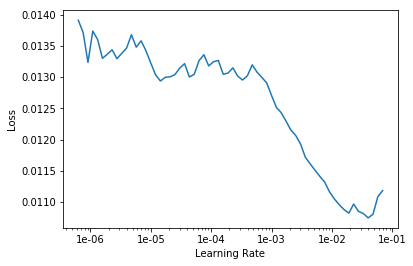

In [14]:
learn.lr_find()
learn.recorder.plot()

In [20]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(3e-3))

epoch,train_loss,valid_loss,mean_squared_error,time
0,0.005336,0.007168,0.007168,10:24
1,0.003676,0.006135,0.006135,10:40


In [ ]:
# l = []
# for x in range(df_test.Id.count()):
#     df_output.loc[x, 'winPlacePerc'] = str(float(preds[x]))
#     if x%100 == 0:
#         print(x)
# print("done")

In [ ]:
# data_to_submit.to_csv('csv_to_submit.csv', index = False)

In [ ]:
preds,y = learn.get_preds(ds_type=DatasetType.Test)

In [ ]:
flist = []
for x in range(df_test.Id.count()):
        flist.append(float(preds[x][0]))
    

In [ ]:
df_output['winPlacePerc'] = flist

In [ ]:
data_to_submit = pd.DataFrame({
    'Id':df_output['Id'],
    'winPlacePerc':df_output['winPlacePerc']
})

In [ ]:
data_to_submit.to_csv('csv_to_submit.csv', index = False)